<a href="https://colab.research.google.com/github/atharvchothe/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

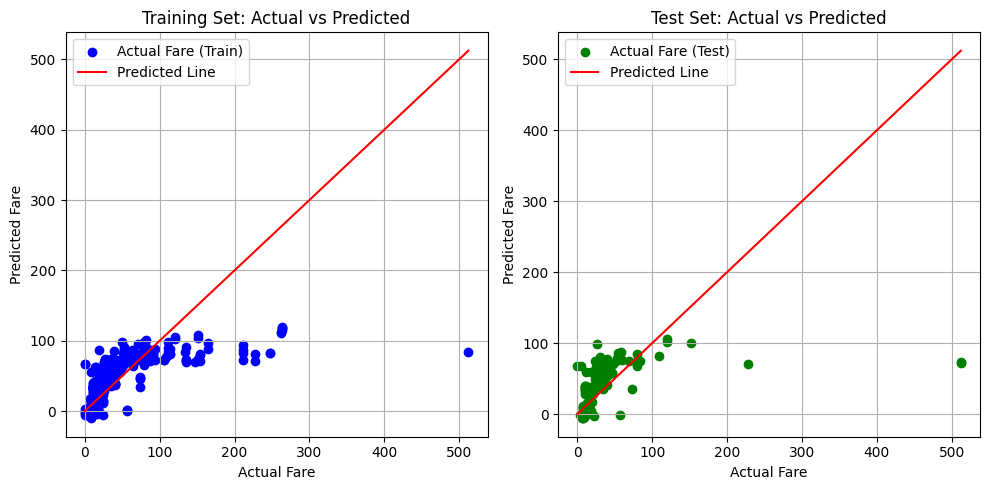

Intercept: 74.23510846264125
Coefficients: [ -2.78371224   4.24379975 -72.03801857 -10.65523967  33.91942689
  71.45679083]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 1. Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# 2. Keep only numerical columns
df_num = df.select_dtypes(include=[np.number]).dropna()

X = df_num.drop('Fare', axis=1)
y = df_num['Fare']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

plt.figure(figsize=(10, 5))

# Train Plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue', label='Actual Fare (Train)')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', label='Predicted Line')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.legend()
plt.grid(True)

# Test Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='green', label='Actual Fare (Test)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Predicted Line')
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
